In [1]:
import numpy as np
import pandas as pd
from sklearn.datasets import load_boston
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
import matplotlib.pyplot as plt

In [2]:
dataset = load_boston()
df = pd.DataFrame(dataset.data, columns=dataset.feature_names)

In [3]:
np.random.seed(42)

x = dataset.data[:, :]
y = dataset.target

x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.3)

In [4]:
regr = LinearRegression()
regr.fit(x_train, y_train)
r2_score = regr.score(x_test, y_test)

print(f"Coef: {regr.coef_}")
print(f"Intercept: {regr.intercept_}")
print(f"R2-Score: {r2_score}")

Coef: [-1.33470103e-01  3.58089136e-02  4.95226452e-02  3.11983512e+00
 -1.54170609e+01  4.05719923e+00 -1.08208352e-02 -1.38599824e+00
  2.42727340e-01 -8.70223437e-03 -9.10685208e-01  1.17941159e-02
 -5.47113313e-01]
Intercept: 31.63108403569312
R2-Score: 0.7112260057484907


### Non-linear Transformation:

$\vec{x} =\left(\!
    \begin{array}{c}
      x_1 \\
      x_2
    \end{array}
  \!\right) $ Wir haben Datenpunkte mit z.B. 2 Features.  
  
$\vec{z} = \phi(\vec{x})$   Wir wollen dann eine Transformation mit dem Grad=2 ausführen.  

$\vec{z} =\left(\!
    \begin{array}{c}
      z_1 \\
      \vdots \\
      z_9
    \end{array}
  \!\right) $ Daraus resultierenden dann (in dem Beispiel) 6 Features.  

#### Polynomial Regression:

$\vec{y} = \mathbf{Z}\vec{\beta} + \vec{\epsilon}$  
$\mathbf{Z}$ ist hier dann der Datensatz nach der Transformation.

#### Visualization

In [5]:
def plot_residuals(regr, x_train, y_train, x_test, y_test):
    y_pred_train = regr.predict(x_train)
    y_pred_test = regr.predict(x_test)
    
    min_val = min(np.min(y_pred_train), np.min(y_pred_test))
    max_val = max(np.max(y_pred_train), np.max(y_pred_test))
    
    plt.scatter(y_pred_train, y_pred_train - y_train, color="blue")
    plt.scatter(y_pred_test, y_pred_test - y_test, color="red")
    plt.hlines(y=0, xmin=min_val, xmax=max_val)
    plt.legend(["Train", "Test"])
    plt.show()

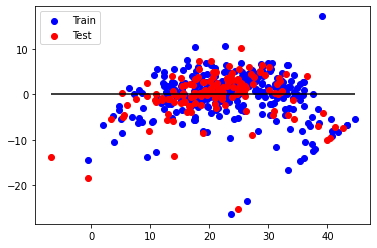

In [6]:
plot_residuals(regr, x_train, y_train, x_test, y_test)